# Amazon Copurchased

This is a Python notebook created using "jupyter".

Author: Rafael J. P. dos Santos

In [1]:
import time
started_at = time.time()
print started_at

1549325712.41


## Condições do experimento

* Quantidade limitada de arestas
* Todas as features
* Quantidade variável de n_estimators

## Parameters

We use the parameter below to set the maximum number of edges to be read from the CSV containing edges (links).

In [2]:
max_edges = 160000 # Set quantity to read from file
edges_csv_file = "data/20180812_links"
nodes_csv_file = "data/20180812_nodes"
n_estimators = 20
features = 'all'

In [3]:
# Parameters
n_estimators = 20
max_edges = 20000
features = "all"


## Load the libraries

Let's load the Python libraries that we will need throughout the script

In [4]:
%load_ext autoreload
%autoreload 1
%aimport shared_functions
import pandas as pd
import numpy as np
from __future__ import division
import shared_functions
from IPython.display import display, HTML

## Read graph

### Read only first lines of datafile

Due to slowness in calculating centrality measures, we use the parameter provided in the beggining of the script to limit the number of edges we will read.

In [5]:
G = shared_functions.read_G(edges_csv_file, max_edges)

Using 20000 edges out of 229338 available (8.72% of data)


### Calculate nodes centrality measures

Now that we have our NetworkX graph, let's calculate some centrality measures for every node.

In [6]:
centrality_measures = shared_functions.centrality_measures(G)
print centrality_measures.keys()

['eigenvector_centrality', 'degree', 'betweenness_centrality']


### Load node properties

Let's load the CSV containing the nodes data (title, price) into a Pandas dataframe, and append the centrality measures calculated above.

In [7]:
df = pd.read_csv(nodes_csv_file)

####  Convert ID to random int to avoid leaking knowledge

In [8]:
df = shared_functions.add_sha256_column_from_id(df)

#### Add centrality measures

In [9]:
df = shared_functions.merge_columns(df, centrality_measures)

### Let's convert some fields to numeric

In [10]:
if features == 'all':
    
    categorical_features = [
        'category1',
        'category2',
        'category3',
        'category4',
        'category5',
        'category6',
        'category7',
        'category8',
        'category9',
        'category10',
        'language',
        'coverType',
        'publisher',
        'rankingCategory',
        'authors'
    ]

    numeric_features = [
        'degree',
        'eigenvector_centrality',
        'betweenness_centrality',
        'ranking',
        'reviewCount',
        'pages',
        'weight',
        'height',
        'width',
        'depth',
        'rating'
    ]
    
elif features == 'all_except_network_metrics':
    
    categorical_features = [
        'category1',
        'category2',
        'category3',
        'category4',
        'category5',
        'category6',
        'category7',
        'category8',
        'category9',
        'category10',
        'language',
        'coverType',
        'publisher',
        'rankingCategory',
        'authors'
    ]

    numeric_features = [
        'ranking',
        'reviewCount',
        'pages',
        'weight',
        'height',
        'width',
        'depth',
        'rating'
    ]

elif features == 'none':
    
    categorical_features = []

    numeric_features = []

df = shared_functions.prepare_data(df, numeric_features)

### Remove nodes without price

In [11]:
df = df.drop(df[df["price"].isnull()].index)

### Inspect columns

In [12]:
df.columns

Index([u'id', u'title', u'url', u'authors', u'coverType', u'publisher',
       u'edition', u'publicationDate', u'rankingCategory', u'category1',
       u'category2', u'category3', u'category4', u'category5', u'category6',
       u'category7', u'category8', u'category9', u'category10', u'isbn10',
       u'isbn13', u'language', u'postProcessed', u'price', u'ranking',
       u'pages', u'reviewCount', u'rating', u'width', u'height', u'depth',
       u'weight', u'sha256_id', u'eigenvector_centrality', u'degree',
       u'betweenness_centrality'],
      dtype='object')

### Features summary

Below we have a summary of the Pandas dataframe. We can see the number of nodes that we are actually analyzing, which depends on the max_edges parameter defined before.

In [13]:
pd.set_option('display.max_columns', None)
df.describe(include='all', percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,sha256_id,eigenvector_centrality,degree,betweenness_centrality
count,4102.000000,4102,4102,4102,4057,4061,0.0,401,3844,3797,3797,2852,1425,568,125,9,0.0,0.0,0.0,4063,4063,4061,4102.0,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4.102000e+03,4.102000e+03,4102.000000,4102.000000
unique,NaN,4020,4102,2948,9,427,NaN,334,1,1,28,174,301,165,48,5,NaN,NaN,NaN,4063,4063,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Macroeconomia,https://www.amazon.com.br/dp/8535931015/,Vários Autores (Autor),Capa comum,Companhia das Letras,NaN,5 de fevereiro de 2014,Livros,Livros,Literatura e Ficção,Filosofia,Matemática,Faculdade,Probabilidade e Estatística,Abstrata,NaN,NaN,NaN,8525431494,978-8521318378,Português,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,1,39,3305,355,NaN,5,3844,3797,591,325,138,41,14,3,NaN,NaN,NaN,1,1,3386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2860.202340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,90.115580,35716.256500,378.541697,16.646056,4.450203,15.334128,22.322795,2.217189,442.921269,2.101962e+09,3.745309e-03,8.495368,0.001923
std,2114.015301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,190.122651,56611.803539,261.572101,37.048344,0.530242,2.482813,2.501593,1.289773,202.962448,1.228866e+09,1.488494e-02,22.295140,0.006495
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.990000,3.000000,4.000000,1.000000,1.000000,2.600000,8.600000,0.200000,9.100000,2.291770e+05,5.860282e-08,1.000000,0.000000
25%,1195.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,27.990000,5789.250000,216.000000,3.000000,4.400000,13.800000,20.800000,1.400000,299.000000,1.028654e+09,7.887278e-06,1.000000,0.000000
50%,2617.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,39.930000,18060.500000,320.000000,10.000000,4.453925,15.400000,22.800000,2.000000,444.980143,2.078429e+09,3.873898e-05,2.000000,0.000255
75%,3958.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,66.867500,37204.750000,464.000000,16.618748,4.800000,16.000000,23.400000,2.800000,544.000000,3.142654e+09,2.491863e-04,6.000000,0.001256


Below we can inspect the first rows of data, containing title, price, degree and other centrality measures.

In [14]:
df.head(10)

,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,sha256_id,eigenvector_centrality,degree,betweenness_centrality
0,1,The Stanford Mathematics Problem Book: With Hi...,https://www.amazon.com.br/dp/0486469247/,"George Polya (Autor),",Capa comum,Dover Publications,NaN,19 de fevereiro de 2009,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Estudo e Ensino,NaN,NaN,NaN,NaN,NaN,0486469247,978-0486469249,Inglês,1,26.25,59183.0,68.0,1.000000,4.000000,14.0,21.0,0.6,181.0,3564330554,0.012592,19,0.004614
1,2,Fourier Series,https://www.amazon.com.br/dp/0486633179/,"Georgi P. Tolstov (Autor),",Capa comum,Dover Publications,NaN,1 de junho de 1976,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Probabilidade e Estatística,NaN,NaN,NaN,NaN,0486633179,978-0486633176,Inglês,1,50.37,56112.0,352.0,3.000000,4.600000,14.6,21.0,1.9,363.0,1309098117,0.053493,62,0.001861
2,3,Probability Theory: A Concise Course,https://www.amazon.com.br/dp/0486635449/,"Y. A. Rozanov (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Probabilidade e Estatística,NaN,NaN,NaN,NaN,0486635449,978-0486635446,Inglês,1,29.23,44345.0,160.0,16.618748,4.453925,14.4,20.8,0.8,200.0,1260550007,0.034533,59,0.006246
3,4,"Vectors, Tensors and the Basic Equations of Fl...",https://www.amazon.com.br/dp/0486661105/,"Rutherford Aris (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Engenharia e Transporte,Engenharia,Mecânica,Hidráulica,NaN,NaN,NaN,NaN,0486661105,978-0486661100,Inglês,1,48.79,82275.0,320.0,2.000000,4.500000,13.7,21.5,1.6,381.0,4012708477,0.011867,18,0.002487
4,5,Ordinary Differential Equations,https://www.amazon.com.br/dp/0486649407/,"Morris Tenenbaum (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Equações Diferenciais,NaN,NaN,NaN,NaN,0486649407,978-0486649405,Inglês,1,71.63,40840.0,848.0,4.000000,4.500000,13.8,21.8,4.0,939.0,3891707921,0.074789,88,0.009983
5,6,The Variational Principles of Mechanics,https://www.amazon.com.br/dp/0486650677/,"Cornelius Lanczos (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Mecânica,NaN,NaN,NaN,NaN,NaN,0486650677,978-0486650678,Inglês,1,88.15,36960.0,418.0,1.000000,5.000000,13.8,21.5,2.2,581.0,2030201243,0.050002,43,0.006515
6,7,A First Look at Perturbation Theory,https://www.amazon.com.br/dp/0486675513/,James G. Simmonds (Autor),Capa comum,Dover Publications Inc.,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Equações Diferenciais,NaN,NaN,NaN,NaN,0486675513,978-0486675510,Inglês,1,36.10,37291.0,160.0,16.618748,4.453925,13.7,21.5,0.8,159.0,744636978,0.008733,9,0.000448
7,8,Thermodynamics and the Kinetic Theory of Gases...,https://www.amazon.com.br/dp/0486414612/,"Wolfgang Pauli (Autor),",Capa comum,Dover Publications,NaN,18 de outubro de 2010,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Dinâmica,Termodinâmica,NaN,NaN,NaN,NaN,0486414612,978-0486414614,Inglês,1,26.01,24406.0,160.0,2.000000,5.000000,13.8,21.6,1.0,159.0,425205287,0.004539,10,0.005746
8,9,Mechanics,https://www.amazon.com.br/dp/0486607542/,"Jacob P. Den Hartog (Autor),",Capa comum,Dover Publications,NaN,1 de junho de 1961,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Mecânica,NaN,NaN,NaN,NaN,NaN,0486607542,978-0486607542,Inglês,1,50.96,90609.0,480.0,16.618748,4.453925,13.6,20.3,2.3,522.0,1246026773,0.019511,23,0.001169
9,10,Statistical Thermodynamics,https://www.amazon.com.br/dp/0486661016/,"Erwin Schrodinger (Autor),",Capa comum,Dover Publications,NaN,NaN,Liv

## Random forest using various features, price as target

### Preparing data

In [15]:
target, features, feature_list, test_features, test_target = shared_functions.prepare_datasets(df, numeric_features, categorical_features, 'price')

Numeric features:  ['degree', 'eigenvector_centrality', 'betweenness_centrality', 'ranking', 'reviewCount', 'pages', 'weight', 'height', 'width', 'depth', 'rating']
Categorical features:  ['category1', 'category2', 'category3', 'category4', 'category5', 'category6', 'category7', 'category8', 'category9', 'category10', 'language', 'coverType', 'publisher', 'rankingCategory', 'authors']
Target column:  price


Test percentage:  0.199902486592
Train features shape:  (3282, 4113)
Train target shape:  (3282,)
Test features shape:  (820, 4113)
Test target shape:  (820,)


### Average price and median price as baselines

It's important to have a baseline, so we can validate our predictions after running our model. One easy choice for baseline is the average price of a book.

We have an average price around R\$43, so this means that a very easy prediction would be to always guess R$43 for the price of any book.

In [16]:
average_target = np.average(target)
median_target = np.median(target)
print "Average price: R$", average_target
print "Median parice; R$", median_target

Average price: R$ 89.53968007312614
Median parice; R$ 39.9


### Cross val

#### Run cross val

In [17]:
estimators, splits, scores = shared_functions.run_cross_validation_regression(features, target, n_estimators)

#### Cross val score

In [18]:
shared_functions.print_score_summary(scores)

=== Relative
RF relative abs mean:  0.3558119472173548
RF relative abs std:  0.020933934850408245
Baseline (average) relative mean:  1.664630262174694
Baseline (average) relative std:  0.06222416432679138
Baseline (median) relative mean:  0.5464955578757401
Baseline (median) relative std:  0.024090462205780212
=== Absolute
RF abs mean:  33.529969729501815
RF abs std:  7.213961584766068
Baseline (average) mean:  84.01956601482308
Baseline (average) std:  9.976251420855856
Baseline (median) mean:  62.34668500259471
Baseline (median) std:  11.892957395343988


####  List of most important features

In [19]:
shared_functions.get_most_important_features(estimators, feature_list)

,feature,mean importance,std,std/mean
0,eigenvector_centrality,29.247678,1.561186,0.053378
1,pages,12.361015,3.066173,0.248052
2,width,7.629134,2.428442,0.318312
3,betweenness_centrality,6.931342,1.236932,0.178455
4,coverType_Capa dura,6.244864,3.198618,0.512200
5,publisher_Cengage Learning,4.017682,2.213287,0.550887
6,publisher_McGraw-Hill Science/Engineering/Math,3.997696,1.790719,0.447938
7,height,3.264897,0.733175,0.224563
8,coverType_Capa comum,2.765633,1.727971,0.624801
9,degree,1.688065,0.532216,0.315282


### Predicted price vs real price

Splits quantity:  10
Splits lenghts:  [329, 329, 328, 328, 328, 328, 328, 328, 328, 328]
X shape:  (3282, 4113)
y shape:  (3282,)


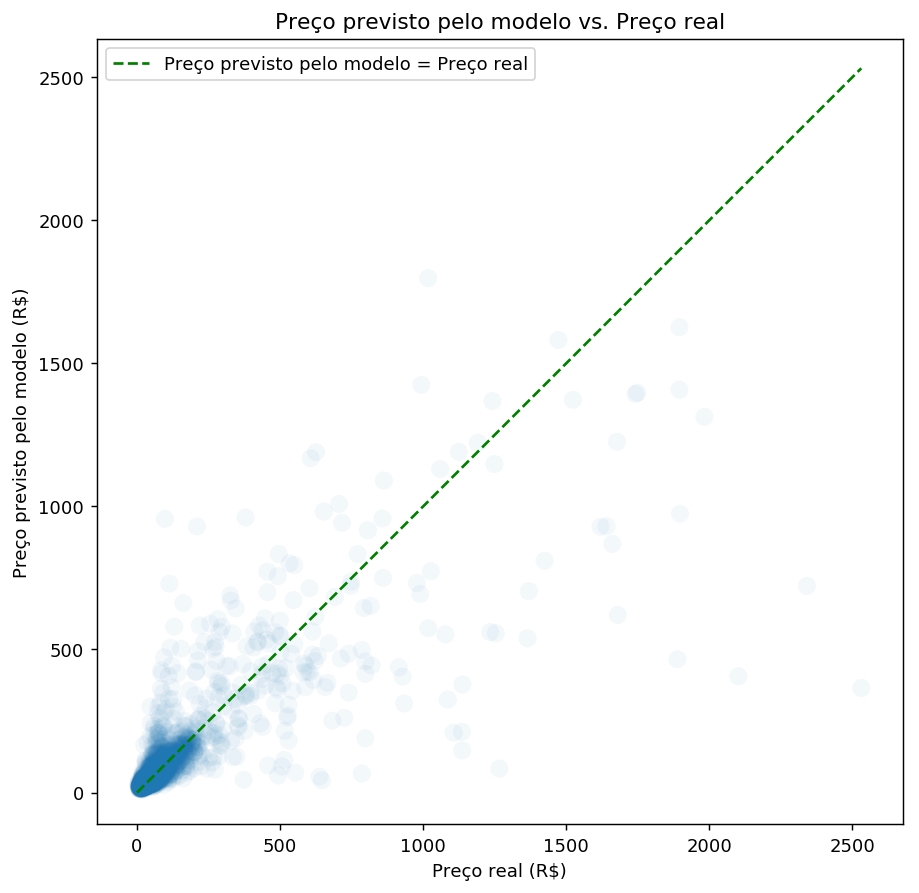

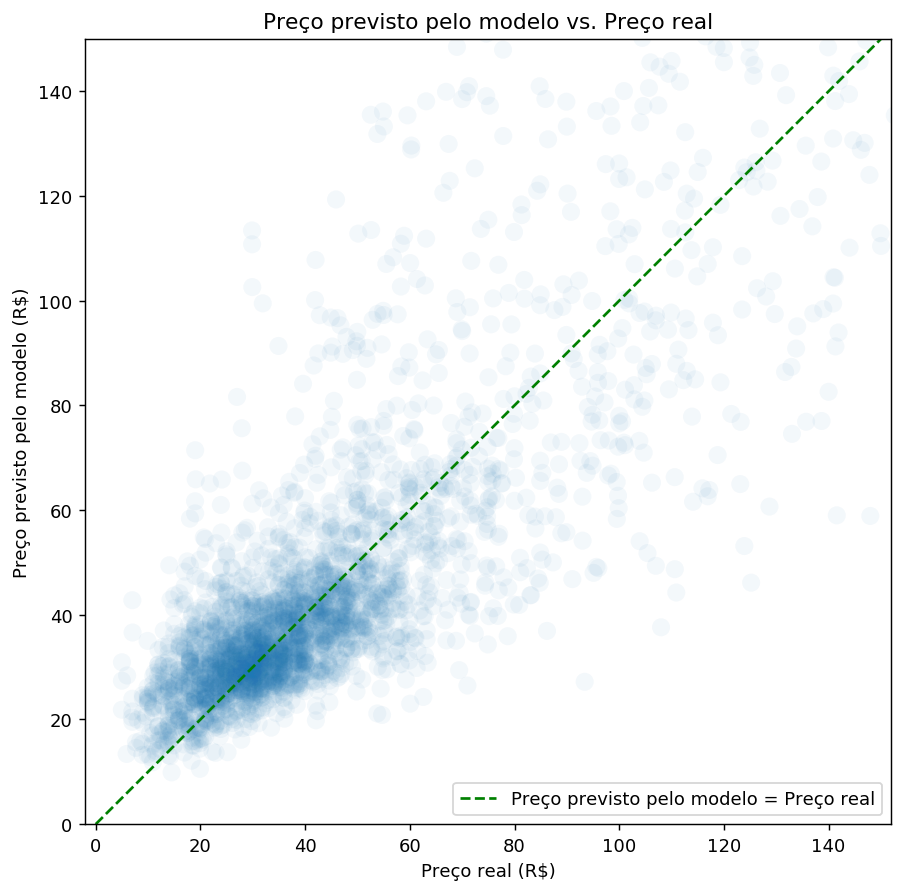

In [20]:
y_pred = shared_functions.get_all_predictions_from_splits(features, target, splits, estimators)                                                  
shared_functions.plot_splits_predicted_vs_real(target, y_pred, title=u'Preço previsto pelo modelo vs. Preço real', xlabel=u'Preço real (R$)', ylabel=u'Preço previsto pelo modelo (R$)', legend=u'Preço previsto pelo modelo = Preço real', zoomY = 150)

### Mean absolute error

Now we can compare the errors obtained by our predictions against the errors provided by the baseline (average price). Our prediction errors should be less than the baseline errors to consider the model successful.

In [21]:
errors, errors_baseline, errors_relative, errors_baseline_relative, errors_baseline_median, errors_baseline_median_relative = shared_functions.print_mean_absolute_error(y_pred, target, average_target, median_target)

== Absolute
('Mean absolute prediction error: R$', 33.53)
('Std prediction error: R$', 107.22)
('Mean absolute error using average: R$', 84.02)
('Std prediction error using average: R$', 171.27)
('Mean absolute error using median: R$', 62.34)
('Std prediction error using median: R$', 187.0)
== Relative
('Mean relative absolute prediction error: ', 0.36)
('Std relative prediction error: ', 0.51)
('Mean relative absolute error using average: ', 1.66)
('Std relative prediction error using average: ', 1.61)
('Mean absolute error using median: R$', 0.55)
('Std prediction error using median: R$', 0.58)


### Join data

In [22]:
pd.set_option('display.max_columns', None)
predicted_df, joined_predicted_df = shared_functions.join_predicted_df(df, features, target, y_pred, errors, errors_relative, errors_baseline, errors_baseline_relative, errors_baseline_median, errors_baseline_median_relative)

### Worst absolute predictions

Below we can inspect the rows with the biggest prediction error.

In [23]:
joined_predicted_df.sort_values('error', ascending = False).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4.565469e+08,"[456546893.0, 13.0, 0.0210727178754, 0.0002426...",2165.6805,2441.53032,2491.17,0.984236,0.964624,0.855638,365.3895,2531.07,1685,Complex Analysis Complex Analysis Complex Anal...,https://www.amazon.com.br/dp/0070006571/,"Lars V. Ahlfors (Autor),",Capa dura,McGraw-Hill Science/Engineering/Math,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0070006571,978-0070006577,Inglês,1,2531.07,36626.500628,345.000000,16.618748,4.453925,16.000000,23.100000,2.500000,444.980143,0.021073,13,0.000243
1.144179e+09,"[1144179495.0, 4.0, 0.00338631390905, 0.000125...",1695.2050,2012.00032,2061.64,0.981014,0.957393,0.806649,406.3350,2101.54,1991,Machine Learning,https://www.amazon.com.br/dp/0070428077/,"Tom M. Mitchell (Autor),",Capa dura,McGraw-Hill Science/Engineering/Math,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0070428077,978-0070428072,Inglês,1,2101.54,36626.500628,432.000000,16.618748,4.453925,16.800000,24.100000,3.300000,921.000000,0.003386,4,0.000125
1.731114e+09,"[1731113829.0, 13.0, 0.025706204142, 0.0025046...",1619.0055,2251.66032,2301.30,0.982957,0.961755,0.691528,722.1945,2341.20,1779,Modern Physics for Scientists and Engineers,https://www.amazon.com.br/dp/1133103723/,"Stephen T. Thornton (Autor),",Capa dura,Cengage Learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1133103723,978-1133103721,Inglês,1,2341.20,36626.500628,688.000000,16.618748,4.453925,20.300000,25.400000,3.200000,444.980143,0.025706,13,0.002505
9.158984e+07,"[91589843.0, 13.0, 0.0217120590348, 0.00037778...",1422.5765,1799.22032,1848.86,0.978875,0.952593,0.753180,466.1835,1888.76,1712,Vector Calculus,https://www.amazon.com.br/dp/1429215089/,"Jerrold E. Marsden (Autor),",Capa dura,W.H. Freeman & Company,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Análise Vetorial,NaN,NaN,NaN,NaN,1429215089,978-1429215084,Inglês,1,1888.76,311760.000000,545.000000,16.618748,4.453925,21.000000,26.000000,3.200000,444.980143,0.021712,13,0.000378
2.611927e+09,"[2611927292.0, 1.0, 0.00083333710589, 0.0, 366...",1182.5975,1176.82032,1226.46,0.968492,0.929294,0.933856,83.7625,1266.36,1937,The Physics of Low-dimensional Semiconductors:...,https://www.amazon.com.br/dp/0521481481/,Dr John H. Davies (Autor),Capa dura,Cambridge University Press,NaN,13 de dezembro de 1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0521481481,978-0521481489,Inglês,1,1266.36,36626.500628,458.000000,16.618748,4.453925,17.700000,25.300000,2.500000,444.980143,0.000833,1,0.000000
1.859584e+09,"[1859584463.0, 2.0, 0.00478533595471, 0.000303...",1059.4240,1590.55032,1640.19,0.976251,0.946705,0.630576,620.6660,1680.09,1918,Electric Machinery and Power System Fundamentals,https://www.amazon.com.br/dp/0072291354/,Stephen J. Chapman (Autor),Capa dura,McGraw-Hill Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0072291354,978-0072291353,Inglês,1,1680.09,36626.500628,696.000000,16.618748,4.453925,19.000000,23.400000,3.300000,444.980143,0.004785,2,0.000304
1.088718e+09,"[1088718135.0, 32.0, 0.0359736675015, 0.002620...",988.9010,1046.74032,1096.38,0.964885,0.921199,0.870297,147.3790,1136.28,1830,Geometric Algebra,https://www.amazon.com.br/dp/0471608394/,E. Artin (Autor),Capa comum,Wiley-Blackwell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0471608394,978-0471608394,Inglês,1,1136.28,36626.500628,224.000000,16.618748,4.453925,14.700000,22.900000,1.200000,308.000000,0.035974,32,0.002620
2.337783e+08,"[23377

### Worst relative predictions

In [24]:
joined_predicted_df.sort_values('error_relative', ascending = False).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.142250e+08,"[114225047.0, 1.0, 0.00250298590856, 0.0, 5260...",859.2500,7.59032,57.23,0.589210,0.078146,8.846391,956.3800,97.13,2078,GRE Prep 2019: Practice Tests + Proven Strateg...,https://www.amazon.com.br/dp/1506234585/,Kaplan Test Prep (Autor),Capa comum,Kaplan Publishing,NaN,5 de junho de 2018,Livros,Livros,Inglês e Outras Línguas,"Educação, Referência e Didáticos",Preparação para Provas,Pós-Graduação e Profissionais,GRE,NaN,NaN,NaN,NaN,1506234585,978-1506234588,Inglês,1,97.13,52600.000000,696.0,16.618748,4.453925,21.3,27.6,3.3,444.980143,0.002503,1,0.000000
2.381738e+09,"[2381737828.0, 34.0, 0.00386472487798, 0.02612...",141.8080,64.54968,14.91,0.596639,2.583020,5.674590,166.7980,24.99,207,Meus Últimos Anos. Os Escritos da Maturidade d...,https://www.amazon.com.br/dp/8520935419/,Albert Einstein (Autor),Capa dura,Nova Fronteira,NaN,NaN,Livros,Livros,Ciências,Física,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8520935419,978-8520935415,Português,1,24.99,4978.000000,272.0,3.000000,5.000000,15.8,23.6,2.0,540.000000,0.003865,34,0.026127
1.641909e+09,"[1641909461.0, 1.0, 0.00158560771024, 0.0, 366...",617.2635,23.41032,73.05,0.646746,0.207263,5.464927,730.2135,112.95,1764,The Ashtray: (Or the Man Who Denied Reality),https://www.amazon.com.br/dp/0226922685/,Errol Morris (Autor),Capa dura,University of Chicago Press,NaN,16 de maio de 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0226922685,978-0226922683,Inglês,1,112.95,36626.500628,192.0,16.618748,4.453925,20.3,25.4,2.0,444.980143,0.001586,1,0.000000
1.606169e+09,"[1606168911.0, 159.0, 0.00145411457417, 0.0115...",252.9490,42.80968,6.83,0.146159,0.916107,5.412990,299.6790,46.73,552,David Copperfield,https://www.amazon.com.br/dp/8582850670/,"Charles Dickens (Autor),",Capa comum,Penguin,NaN,NaN,Livros,Livros,Literatura e Ficção,Literatura Clássica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8582850670,978-8582850671,Português,1,46.73,357.000000,1160.0,3.000000,5.000000,13.2,20.0,5.4,444.980143,0.001454,159,0.011529
1.790101e+09,"[1790101457.0, 2.0, 3.48277300114e-05, 0.00136...",25.9255,84.53968,34.90,6.980000,16.907936,5.185100,30.9255,5.00,3579,Baudolino,https://www.amazon.com.br/dp/8577990028/,Umberto Eco (Autor),Capa comum,Best Seller,NaN,NaN,Livros,Livros,Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8577990028,978-8577990023,Português,1,5.00,35903.000000,602.0,15.000000,4.300000,11.8,17.8,2.2,458.000000,0.000035,2,0.001361
2.016695e+09,"[2016695322.0, 1.0, 3.95430814371e-06, 0.0, 15...",35.7925,82.54968,32.91,4.708155,11.809682,5.120529,42.7825,6.99,3304,Saúde Total,https://www.amazon.com.br/dp/8546900914/,"William Davis (Autor),",Capa comum,WMF Martins Fontes,NaN,NaN,Livros,Livros,Saúde e Família,Dietas e Emagrecimento,Dietas,NaN,NaN,NaN,NaN,NaN,NaN,8546900914,978-8546900916,Português,1,6.99,1557.000000,512.0,19.000000,4.500000,13.8,20.8,3.4,358.000000,0.000004,1,0.000000
2.839318e+08,"[283931800.0, 1.0, 2.12010957039e-05, 0.0, 146...",22.4095,84.53968,34.90,6.980000,16.907936,4.481900,27.4095,5.00,4791,Um Certo Capitão Rodrigo,https://www.amazon.com.br/dp/8535905987/,Erico Verissimo (Autor),Capa comum,Companhia das Letras,NaN,NaN,Livros,Livros,Literatura e Ficção,Poesia,Europeia,NaN,NaN,NaN,NaN,NaN,NaN,8535905987,978-8535905984,Português,1,5.00,14644.000000,192.0,8.000000,4.800000,13.4,18.4,1.6,222.000000,0.000021,1,0.000000
1.441580e+09,"[1441579817.0, 1.0, 1.94238433389e-05, 0.0, 95...",29.5760,82.50968,32.87,4.675676,11.736797,4.207112,36.6060,7.03,3863,Os Irmãos Bielski,http

### Best absolute predictions

In [25]:
joined_predicted_df.sort_values('error', ascending = True).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3.284410e+09,"[3284409717.0, 1.0, 1.48820758795e-05, 0.0, 28...",0.0260,57.63968,8.00,0.250784,1.806887,0.000815,31.9260,31.90,4281,"Bom Dia, Verônica",https://www.amazon.com.br/dp/8594540175/,Andrea Killmore (Autor),Capa dura,DarkSide,NaN,NaN,Livros,Livros,"Policial, Suspense e Mistério",Mistério,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8594540175,978-8594540171,Português,1,31.90,2810.0,256.0,44.000000,4.300000,16.2,23.4,2.2,499.000000,1.488208e-05,1,0.000000
1.883624e+09,"[1883623786.0, 13.0, 9.84034136184e-06, 0.0007...",0.0315,52.46032,102.10,0.719014,0.369439,0.000222,141.9685,142.00,188,Fundamentos de Transferência de Calor e de Massa,https://www.amazon.com.br/dp/8521625049/,"Theodore Bergman (Autor),",Capa comum,LTC,NaN,NaN,Livros,Livros,Ciências,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8521625049,978-8521625049,Português,1,142.00,2770.0,650.0,7.000000,3.600000,21.0,27.8,3.6,444.980143,9.840341e-06,13,0.000732
3.654257e+09,"[3654256693.0, 1.0, 3.47981200696e-06, 0.0, 18...",0.0340,51.83968,2.20,0.058355,1.375058,0.000902,37.6660,37.70,3738,Manual Politicamente Incorreto da Ciência,https://www.amazon.com.br/dp/8595070105/,Tom Bethell (Autor),Capa comum,Vide,NaN,NaN,Livros,Livros,Ciências,História e Filosofia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8595070105,978-8595070103,Português,1,37.70,18443.0,296.0,18.000000,3.800000,15.7,22.9,1.8,458.000000,3.479812e-06,1,0.000000
2.472640e+09,"[2472640488.0, 3.0, 2.56721183768e-05, 0.00072...",0.0465,59.03968,9.40,0.308197,1.935727,0.001525,30.4535,30.50,4280,A Parábola do Semeador,https://www.amazon.com.br/dp/8592795397/,"Octavia Butler (Autor),",Capa comum,Morro Branco,NaN,NaN,Livros,Livros,"Fantasia, Horror e Ficção Científica",Ficção Científica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8592795397,978-8592795399,Português,1,30.50,1716.0,416.0,5.000000,5.000000,14.0,21.0,2.1,426.000000,2.567212e-05,3,0.000723
1.808460e+09,"[1808460440.0, 3.0, 7.53233590138e-05, 0.00294...",0.0485,43.54968,6.09,0.132420,0.946938,0.001055,45.9415,45.99,555,"Superintelligence: Paths, Dangers, Strategies",https://www.amazon.com.br/dp/0198739834/,Nick Bostrom (Autor),Capa comum,OUP Oxford,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Teoria dos Jogos,NaN,NaN,NaN,NaN,0198739834,978-0198739838,Inglês,1,45.99,34508.0,432.0,4.000000,5.000000,13.0,19.6,2.5,440.000000,7.532336e-05,3,0.002943
1.439031e+09,"[1439030833.0, 5.0, 4.80296394796e-05, 0.00034...",0.0555,56.87968,7.24,0.221678,1.741570,0.001699,32.6045,32.66,4391,Guerra Do Velho,https://www.amazon.com.br/dp/8576572990/,"John Scalzi (Autor),",Capa comum,Aleph,NaN,NaN,Livros,Livros,"Fantasia, Horror e Ficção Científica",Fantasia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8576572990,978-8576572992,Português,1,32.66,2484.0,368.0,185.000000,4.500000,15.4,22.6,2.2,558.000000,4.802964e-05,5,0.000347
3.374152e+09,"[3374151997.0, 1.0, 3.95424374034e-05, 0.0, 61...",0.0585,44.75968,4.88,0.108977,0.999546,0.001306,44.7215,44.78,4346,Os Velhos Marinheiros Ou O Capitão-De-Longo-Curso,https://www.amazon.com.br/dp/8535914072/,Jorge Amado (Autor),Capa comum,Companhia das Letras,NaN,NaN,Livros,Livros,Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8535914072,978-8535914078,Português,1,44.78,61585.0,296.0,4.000000,4.500000,13.8,20.8,1.8,358.000000,3.954244e-05,1,0.000000
3.941730e+09,"[3941729918.0, 3.0, 5.57646877804e-05, 0.00077...",0.0730,21.63968,28.00,0.412371,0.318699,0.001075,67.8270,67.90,1194,Darwin,https://www.amazon.com.br/dp/8586028843/,"Adrian Desmon (Aut

### Best relative predictions

In [26]:
joined_predicted_df.sort_values('error', ascending = True).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3.284410e+09,"[3284409717.0, 1.0, 1.48820758795e-05, 0.0, 28...",0.0260,57.63968,8.00,0.250784,1.806887,0.000815,31.9260,31.90,4281,"Bom Dia, Verônica",https://www.amazon.com.br/dp/8594540175/,Andrea Killmore (Autor),Capa dura,DarkSide,NaN,NaN,Livros,Livros,"Policial, Suspense e Mistério",Mistério,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8594540175,978-8594540171,Português,1,31.90,2810.0,256.0,44.000000,4.300000,16.2,23.4,2.2,499.000000,1.488208e-05,1,0.000000
1.883624e+09,"[1883623786.0, 13.0, 9.84034136184e-06, 0.0007...",0.0315,52.46032,102.10,0.719014,0.369439,0.000222,141.9685,142.00,188,Fundamentos de Transferência de Calor e de Massa,https://www.amazon.com.br/dp/8521625049/,"Theodore Bergman (Autor),",Capa comum,LTC,NaN,NaN,Livros,Livros,Ciências,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8521625049,978-8521625049,Português,1,142.00,2770.0,650.0,7.000000,3.600000,21.0,27.8,3.6,444.980143,9.840341e-06,13,0.000732
3.654257e+09,"[3654256693.0, 1.0, 3.47981200696e-06, 0.0, 18...",0.0340,51.83968,2.20,0.058355,1.375058,0.000902,37.6660,37.70,3738,Manual Politicamente Incorreto da Ciência,https://www.amazon.com.br/dp/8595070105/,Tom Bethell (Autor),Capa comum,Vide,NaN,NaN,Livros,Livros,Ciências,História e Filosofia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8595070105,978-8595070103,Português,1,37.70,18443.0,296.0,18.000000,3.800000,15.7,22.9,1.8,458.000000,3.479812e-06,1,0.000000
2.472640e+09,"[2472640488.0, 3.0, 2.56721183768e-05, 0.00072...",0.0465,59.03968,9.40,0.308197,1.935727,0.001525,30.4535,30.50,4280,A Parábola do Semeador,https://www.amazon.com.br/dp/8592795397/,"Octavia Butler (Autor),",Capa comum,Morro Branco,NaN,NaN,Livros,Livros,"Fantasia, Horror e Ficção Científica",Ficção Científica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8592795397,978-8592795399,Português,1,30.50,1716.0,416.0,5.000000,5.000000,14.0,21.0,2.1,426.000000,2.567212e-05,3,0.000723
1.808460e+09,"[1808460440.0, 3.0, 7.53233590138e-05, 0.00294...",0.0485,43.54968,6.09,0.132420,0.946938,0.001055,45.9415,45.99,555,"Superintelligence: Paths, Dangers, Strategies",https://www.amazon.com.br/dp/0198739834/,Nick Bostrom (Autor),Capa comum,OUP Oxford,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Teoria dos Jogos,NaN,NaN,NaN,NaN,0198739834,978-0198739838,Inglês,1,45.99,34508.0,432.0,4.000000,5.000000,13.0,19.6,2.5,440.000000,7.532336e-05,3,0.002943
1.439031e+09,"[1439030833.0, 5.0, 4.80296394796e-05, 0.00034...",0.0555,56.87968,7.24,0.221678,1.741570,0.001699,32.6045,32.66,4391,Guerra Do Velho,https://www.amazon.com.br/dp/8576572990/,"John Scalzi (Autor),",Capa comum,Aleph,NaN,NaN,Livros,Livros,"Fantasia, Horror e Ficção Científica",Fantasia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8576572990,978-8576572992,Português,1,32.66,2484.0,368.0,185.000000,4.500000,15.4,22.6,2.2,558.000000,4.802964e-05,5,0.000347
3.374152e+09,"[3374151997.0, 1.0, 3.95424374034e-05, 0.0, 61...",0.0585,44.75968,4.88,0.108977,0.999546,0.001306,44.7215,44.78,4346,Os Velhos Marinheiros Ou O Capitão-De-Longo-Curso,https://www.amazon.com.br/dp/8535914072/,Jorge Amado (Autor),Capa comum,Companhia das Letras,NaN,NaN,Livros,Livros,Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8535914072,978-8535914078,Português,1,44.78,61585.0,296.0,4.000000,4.500000,13.8,20.8,1.8,358.000000,3.954244e-05,1,0.000000
3.941730e+09,"[3941729918.0, 3.0, 5.57646877804e-05, 0.00077...",0.0730,21.63968,28.00,0.412371,0.318699,0.001075,67.8270,67.90,1194,Darwin,https://www.amazon.com.br/dp/8586028843/,"Adrian Desmon (Aut

### Relative errors distribution

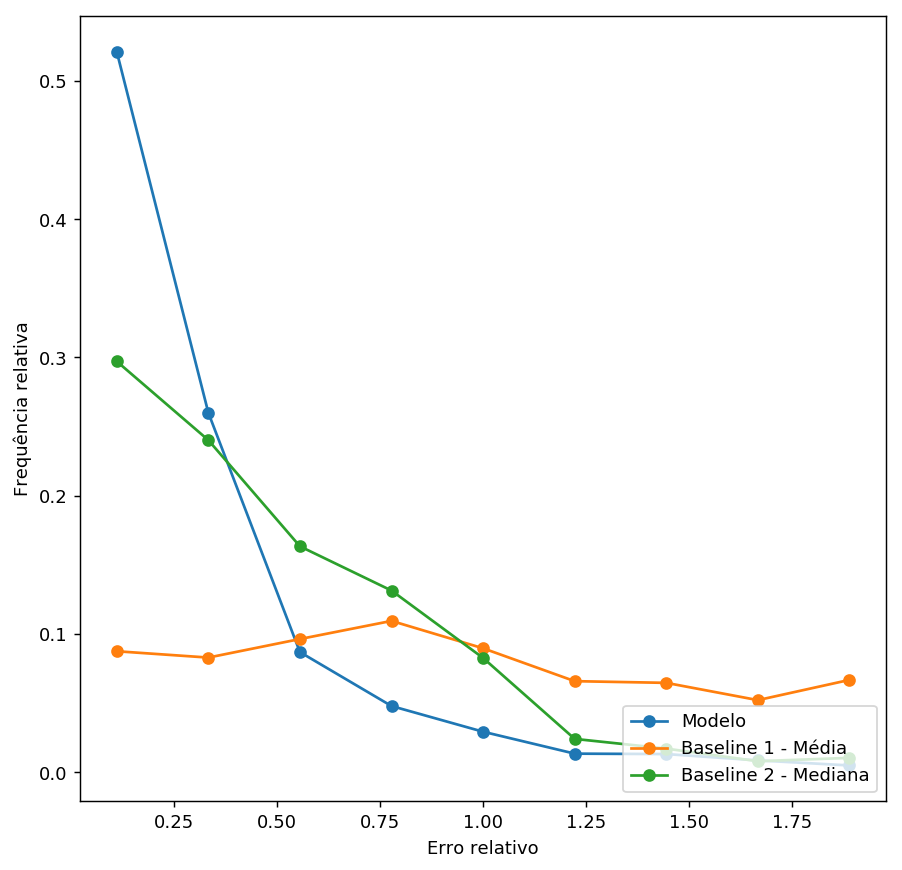

In [27]:
centers, normalized_hist_predicted, normalized_hist_baseline, normalized_hist_baseline_median = shared_functions.plot_relative_error_distribution(predicted_df)

#### Accumulated

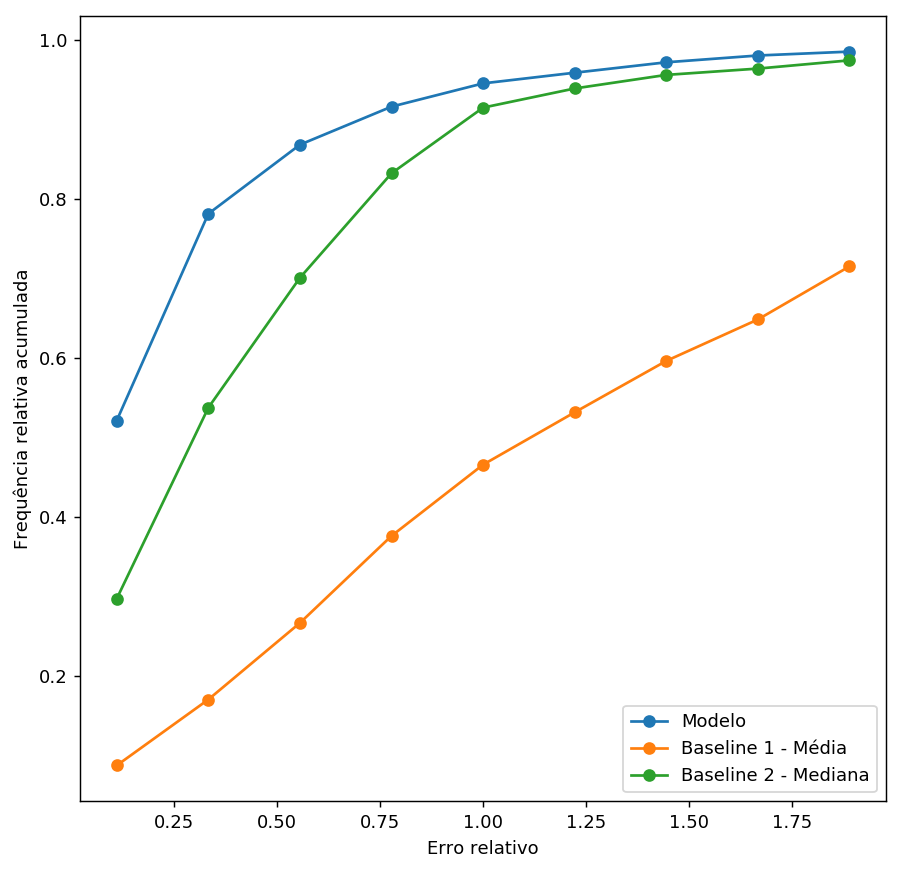

In [28]:
shared_functions.plot_accumulated_relative_error(centers, normalized_hist_predicted, normalized_hist_baseline, normalized_hist_baseline_median)

### Joined data summary

In [29]:
joined_predicted_df.describe(percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,edition,category8,category9,category10,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,0.0,0.0,0.0,0.0,3282.0,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3.282000e+03,3282.000000,3282.000000
mean,33.527769,84.016203,62.343239,0.546484,1.664603,0.355802,85.328438,89.539680,2860.395186,NaN,NaN,NaN,NaN,1.0,89.539680,35635.307167,378.582309,17.181657,4.453304,15.358874,22.342750,2.211488,442.156151,3.658245e-03,8.430530,0.001925
std,107.238476,171.293723,187.027800,0.579205,1.606973,0.512231,150.718805,190.794165,2116.823137,NaN,NaN,NaN,NaN,0.0,190.794165,56486.993868,263.260536,39.554054,0.523558,2.487576,2.511519,1.275296,201.903869,1.487963e-02,21.708542,0.006349
min,0.026000,0.029680,0.000000,0.000000,0.000332,0.000222,9.889000,4.990000,1.000000,NaN,NaN,NaN,NaN,1.0,4.990000,3.000000,4.000000,1.000000,1.000000,2.800000,8.600000,0.200000,9.100000,5.860282e-08,1.000000,0.000000
25%,3.820625,40.502180,7.300000,0.184049,0.628290,0.094983,30.423875,27.990000,1194.250000,NaN,NaN,NaN,NaN,1.0,27.990000,5429.000000,216.000000,3.000000,4.400000,13.800000,20.800000,1.400000,299.000000,7.508390e-06,1.000000,0.000000
50%,8.876000,54.949680,15.000000,0.406956,1.244102,0.210167,39.726000,39.900000,2635.500000,NaN,NaN,NaN,NaN,1.0,39.900000,17996.500000,320.000000,10.000000,4.453925,15.400000,22.800000,2.000000,444.980143,3.777708e-05,2.000000,0.000243
75%,19.369500,66.549680,29.000000,0.740753,2.198988,0.404661,65.773000,65.445000,3955.750000,NaN,NaN,NaN,NaN,1.0,65.445000,37608.000000,464.000000,16.618748,4.800000,16.000000,23.400000,2.800000,540.000000,2.424851e-04,6.000000,0.001235
85%,34.859575,72.739680,65.729500,0.909091,2.894723,0.599086,113.971450,105.629500,4457.850000,NaN,NaN,NaN,NaN,1.0,105.629500,58838.950000,592.000000,16.618748,5.000000,17.000000,24.000000,3.200000,662.000000,6.261602e-04,12.000000,0.002241
90%,54.406750,79.139680,115.000000,1.005025,3.499481,0.793312,162.237750,154.900000,5652.500000,NaN,NaN,NaN,NaN,1.0,154.900000,78518.400000,672.000000,25.000000,5.000000,18.890000,25.090000,3.600000,739.000000,3.195140e-03,18.000000,0.003676
95%,135.655925,238.544320,288.184000,1.495310,4.599730,1.151747,339.710975,328.084000,7529.750000,NaN,NaN,NaN,NaN,1.0,328.084000,132062.350000,838.650000,55.950000,5.000000,20.800000,27.600000,4.400000,839.000000,2.427729e-02,36.000000,0.008922


# Finished

In [30]:
finished_at = time.time()
duration = finished_at - started_at
print "Duração em segundos:"
print duration

Duração em segundos:
117.560981989


<img src="files/image.png">